<a href="https://colab.research.google.com/github/Aditya-Walia1/Stock-Price-Prediction/blob/main/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Using ResNet

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Conv1D, Add, Dense, Flatten


In [ ]:
# Load the dataset
file_path = '/content/AMZN.csv'
data = pd.read_csv(file_path)


In [ ]:
# Display the first few rows of the dataset
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [ ]:
# Select the 'Close' column
close_prices = data['Close'].values


In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices.reshape(-1, 1))


In [ ]:
# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [ ]:
# Define the sequence length
seq_length = 60


In [ ]:
# Create sequences
X, y = create_sequences(close_prices_scaled, seq_length)

In [ ]:
# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)


In [ ]:
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [ ]:
# Define the ResNet-like model
input_layer = Input(shape=(seq_length, 1))


In [ ]:
# First convolutional block
x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(input_layer)
x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(x)

In [ ]:
# Residual connection
x = Add()([x, input_layer])

In [ ]:
# Second convolutional block
x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(x)


In [ ]:
# Residual connection
x = Add()([x, input_layer])


In [ ]:
# Flatten and output
x = Flatten()(x)
output_layer = Dense(1)(x)

model = Model(inputs=input_layer, outputs=output_layer)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Display the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 60, 1)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 60, 64)         │            256 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 60, 64)         │         12,352 │ conv1d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 60, 64)         │              0 │ conv1d_1[0][0],        │
│                           │                        │                │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 60, 64)         │         12,352 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 60, 64)         │         12,352 │ conv1d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 60, 64)         │              0 │ conv1d_3[0][0],        │
│                           │                        │                │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 3840)           │              0 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 1)              │          3,841 │ flatten[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 41,153 (160.75 KB)

 Trainable params: 41,153 (160.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0050 - val_loss: 1.5452e-04
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1.6613e-05 - val_loss: 2.6261e-04
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1.2476e-05 - val_loss: 3.5744e-04
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.8488e-05 - val_loss: 5.2270e-05
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.2212e-05 - val_loss: 0.0081
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.4328e-04 - val_loss: 0.0074
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 4.2287e-04 - val_loss: 9.7079e-05
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 8.0681e-06 - val_loss: 6.8259e-05
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 6.3881e-06 - val_loss: 2.5461e-04
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 5.2891e-05 - val_loss: 3.6474e-04
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss:

In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072
Test Loss: 0.010925991460680962


In [ ]:
# Make predictions
predictions = model.predict(X_test)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
# Inverse transform the predictions and true values to get the original scale
predictions_inverse = scaler.inverse_transform(predictions)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))


RMSE: 19.494442953210434
MAE: 18.265996069304947
MAPE: 15.194357022150745


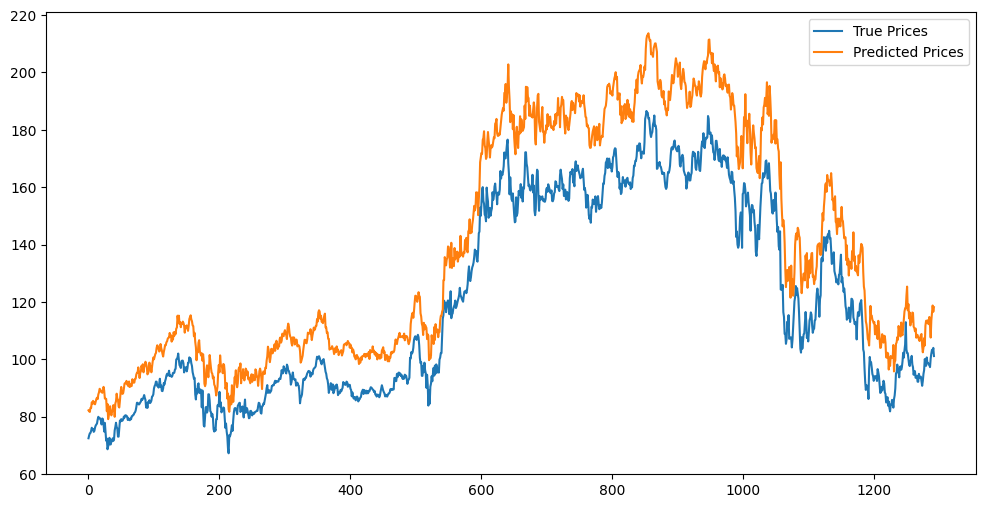

In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions_inverse))
print(f'RMSE: {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test_inverse, predictions_inverse)
print(f'MAE: {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test_inverse - predictions_inverse) / y_test_inverse)) * 100
print(f'MAPE: {mape}')

# Plot the predictions against the true values
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True Prices')
plt.plot(predictions_inverse, label='Predicted Prices')
plt.legend()
plt.show()